In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(font='IPAexGothic', style='white')

In [2]:
train = pd.read_csv('../resource/train.csv')
test = pd.read_csv('../resource/test.csv')
sample = pd.read_csv('../resource/sample.csv', header=None)
print('Data Shapes')
print('Train', train.shape, 'Test', test.shape, 'Sample', sample.shape)



Data Shapes
Train (207, 12) Test (40, 11) Sample (40, 2)


In [3]:
train.index = pd.to_datetime(train['datetime'])
train.head()


,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,,
2013-11-18,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
2013-11-19,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2013-11-20,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
2013-11-21,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
2013-11-22,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [4]:
train.describe()

,y,soldout,kcal,payday,temperature
count,207.000000,207.000000,166.000000,10.0,207.000000
mean,86.623188,0.449275,404.409639,1.0,19.252174
std,32.882448,0.498626,29.884641,0.0,8.611365
min,29.000000,0.000000,315.000000,1.0,1.200000
25%,57.000000,0.000000,386.000000,1.0,11.550000
50%,78.000000,0.000000,408.500000,1.0,19.800000
75%,113.000000,1.000000,426.000000,1.0,26.100000
max,171.000000,1.000000,462.000000,1.0,34.600000


In [5]:
train["payday"] = train["payday"].fillna(0)
train["precipitation"] = train["precipitation"].apply(lambda x : -1 if x == "--" else float(x))
train["event"] = train["event"].fillna("なし")
train["remarks"] = train["remarks"].fillna("なし")
train["month"] = train["datetime"].apply(lambda x : int(x.split("-")[1]))


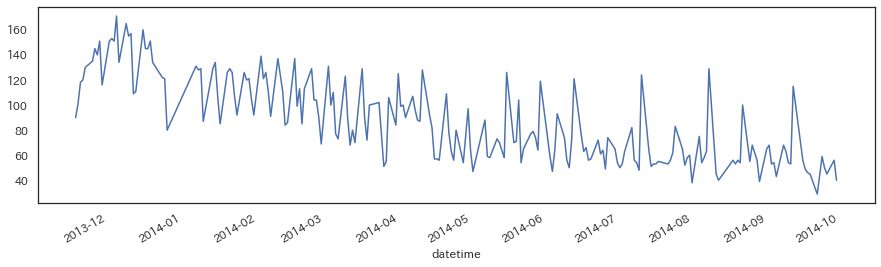

In [6]:
train['y'].plot(figsize=(15, 4))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

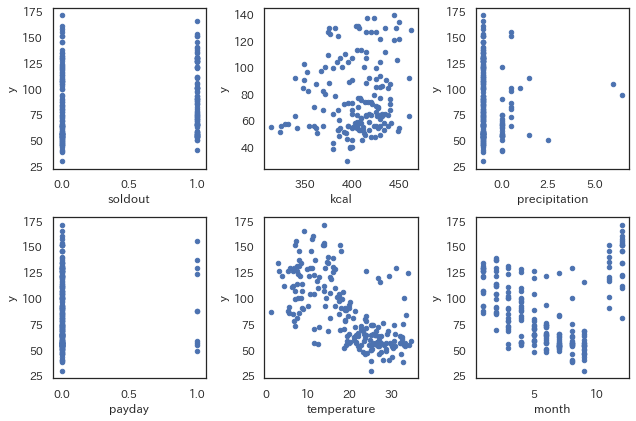

In [7]:
fig, ax = plt.subplots(2,3,figsize=(9,6))
train.plot.scatter(x="soldout", y="y", ax=ax[0][0])
train.plot.scatter(x="kcal", y="y", ax=ax[0][1])
train.plot.scatter(x="precipitation", y="y", ax=ax[0][2])
train.plot.scatter(x="payday", y="y", ax=ax[1][0])
train.plot.scatter(x="temperature", y="y", ax=ax[1][1])
train.plot.scatter(x="month", y="y", ax=ax[1][2])
plt.tight_layout()

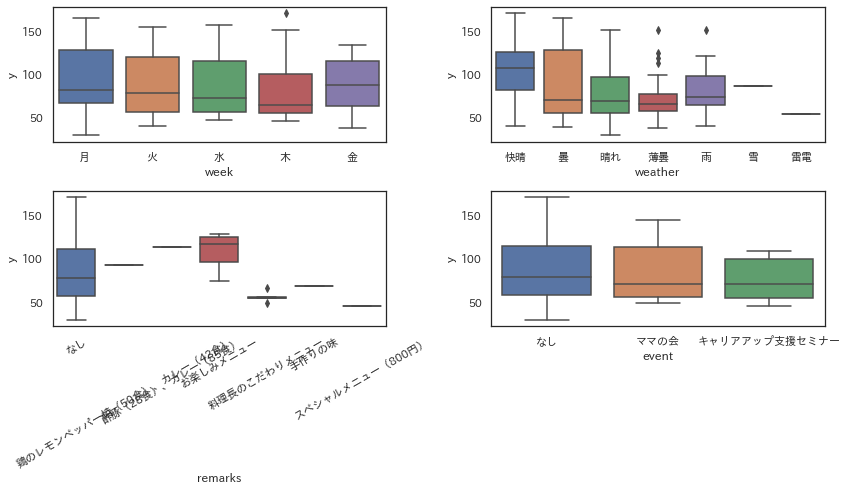

In [8]:
fig, ax = plt.subplots(2,2,figsize=(12,7))
sns.boxplot(x="week",y="y",data=train,ax=ax[0][0])
sns.boxplot(x="weather",y="y",data=train,ax=ax[0][1])
sns.boxplot(x="remarks",y="y",data=train,ax=ax[1][0])
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(),rotation=30)
sns.boxplot(x="event",y="y",data=train,ax=ax[1][1])
plt.tight_layout()

In [9]:
##### Prophet入門【Python編】Facebookの時系列予測ツール #####

In [10]:
# np.log(a) 底をeとするaの対数
train['y'] = np.log(train['y'])
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month
datetime,,,,,,,,,,,,,
2013-11-18,2013-11-18,4.499810,月,0,厚切りイカフライ,NaN,なし,なし,0.0,快晴,-1.0,19.8,11
2013-11-19,2013-11-19,4.615121,火,1,手作りヒレカツ,NaN,なし,なし,0.0,快晴,-1.0,17.0,11
2013-11-20,2013-11-20,4.770685,水,0,白身魚唐揚げ野菜あん,NaN,なし,なし,0.0,快晴,-1.0,15.5,11
2013-11-21,2013-11-21,4.787492,木,1,若鶏ピリ辛焼,NaN,なし,なし,0.0,快晴,-1.0,15.2,11
2013-11-22,2013-11-22,4.867534,金,1,ビッグメンチカツ,NaN,なし,なし,0.0,快晴,-1.0,16.1,11


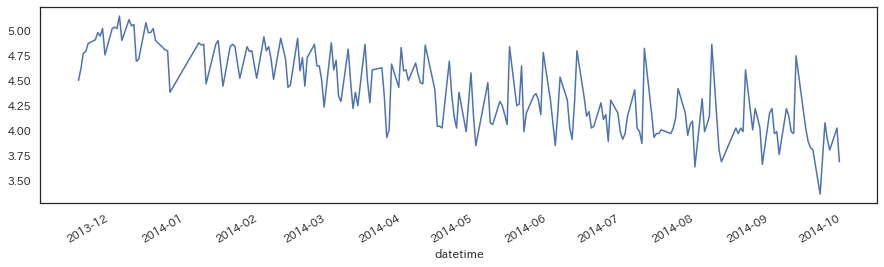

In [11]:
train['y'].plot(figsize=(15, 4))

In [12]:
# 予測モデルの作成
# オブジェクト生成　→　学習（フィッテイング）
from fbprophet import Prophet
model = Prophet()
train = train.rename(columns = {'datetime':'ds'})
model.fit(train)

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
# 予測期間の指定
# 1年（３６５日）のデータフレームを用意
future_df = model.make_future_dataframe(365)
future_df.tail()

,ds
567,2015-09-26
568,2015-09-27
569,2015-09-28
570,2015-09-29
571,2015-09-30


In [14]:
# 予測の作成
forecast_df = model.predict(future_df)
forecast_df[['ds','yhat']].tail()
forecast_df[['ds','yhat']].describe()

,yhat
count,572.000000
mean,3.709284
std,0.602986
min,2.630941
25%,3.215357
50%,3.612781
75%,4.181097
max,5.047213


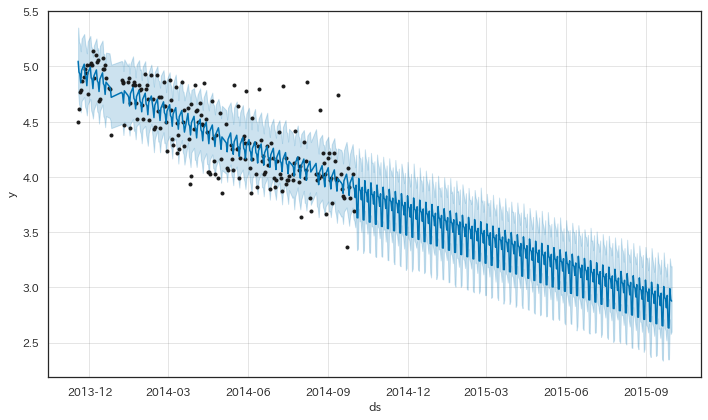

In [15]:
# 予測のプロット
# 黒点のないところが予測結果
model.plot(forecast_df)
plt.show()

In [16]:
'''
# 予測モデル
調整可能なパラメータ
1.線形トレンド or 非線型トレンド
2.変更点、変化点の数
3.週周期と年周期
4.イベント

# トレンドの選択
## 非線型トレンド　
ビジネス時系列は基本的に非線型トレンド
成長上限が決まっている
例：ユーザ数の予測ではWeb人工が上限

## 線形トレンド　
成長初期段階では線形で近似できる
Prophetのデフォルトは線形トレンド
'''

'\n# 予測モデル\n調整可能なパラメータ\n1.線形トレンド or 非線型トレンド\n2.変更点、変化点の数\n3.週周期と年周期\n4.イベント\n\n# トレンドの選択\n## 非線型トレンド\u3000\nビジネス時系列は基本的に非線型トレンド\n成長上限が決まっている\n例：ユーザ数の予測ではWeb人工が上限\n\n## 線形トレンド\u3000\n成長初期段階では線形で近似できる\nProphetのデフォルトは線形トレンド\n'

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


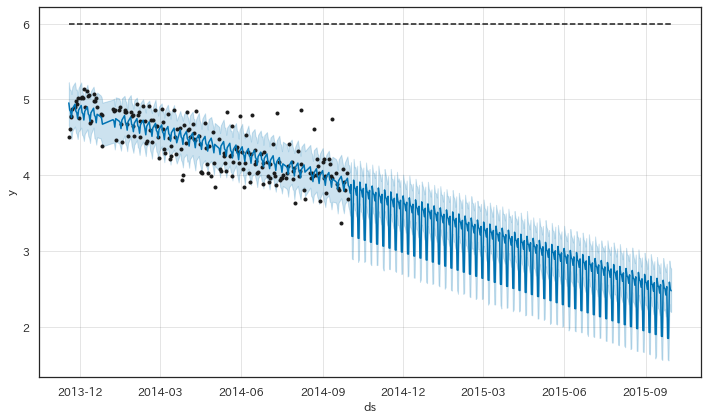

In [17]:
# 1. 線型トレンドの指定
# train['cap']に上限を指定
model = Prophet(growth = 'logistic')
train['cap'] = 6
model.fit(train)
future_df = model.make_future_dataframe(365)
future_df['cap'] = 6
forecast_df = model.predict(future_df)

model.plot(forecast_df)
plt.show()

In [18]:
# 線形トレンドと多少変化している
forecast_df[['ds','yhat']].tail()
forecast_df[['ds','yhat']].describe()

,yhat
count,572.000000
mean,3.498196
std,0.801205
min,1.850433
25%,2.841999
50%,3.455952
75%,4.206909
max,4.954095


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


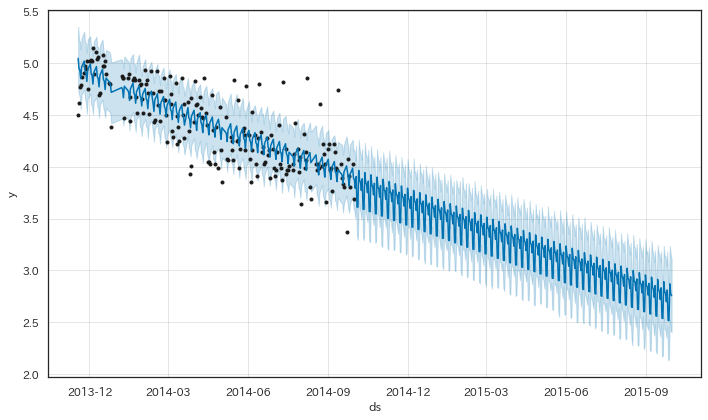

In [36]:
# 2.1 変化点の指定
# 新機能のリリースなどでトレンドが変化
# 今回の弁当では 2014-01-31あたり？

model = Prophet(changepoints = ['2014-04-01'])
model.fit(train)

future_df = model.make_future_dataframe(365)
forecast_df = model.predict(future_df)
model.plot(forecast_df)
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


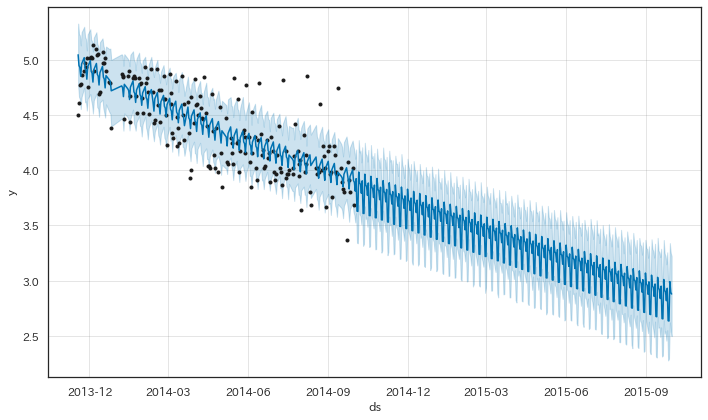

In [33]:
# 2.2 変化点の数を指定
# 等間隔に変化点を置いて推定

model = Prophet(n_changepoints = 3)
model.fit(train)

future_df = model.make_future_dataframe(365)
forecast_df = model.predict(future_df)
model.plot(forecast_df)
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


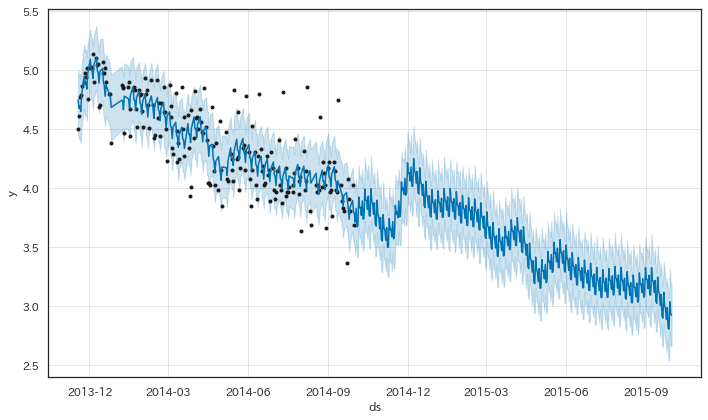

In [37]:
# 3.週周期と年周期の指定

model = Prophet(weekly_seasonality = True,yearly_seasonality = True)
model.fit(train)

future_df = model.make_future_dataframe(365)
forecast_df = model.predict(future_df)
model.plot(forecast_df)
plt.show()

In [ ]:
# 4.イベント効果を指定
# イベント日を列挙したデータフレームを用意する
# 祝日のデータ用意したら面白いかも

'''
model = Prohet(holidays = event_dataframe)
mode.fit(train)
'''

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


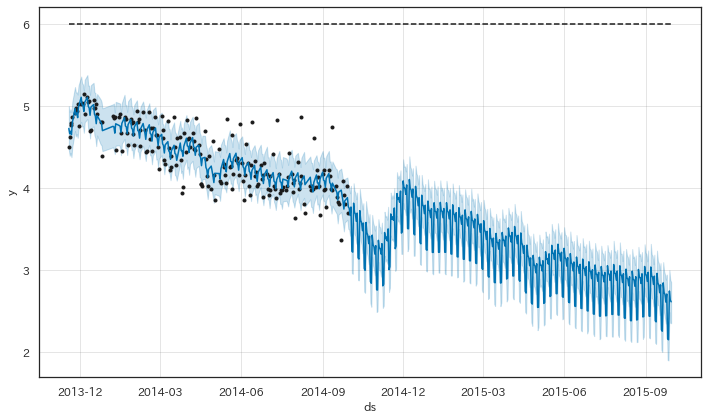

In [35]:
# 1-4の統合版
# 2014-06 - 2014-09 あたりがモデルから外れてる箇所がある

model = Prophet(growth = 'logistic',
               weekly_seasonality = True,yearly_seasonality = True)

train['cap'] = 6
model.fit(train)
future_df = model.make_future_dataframe(365)
future_df['cap'] = 6
forecast_df = model.predict(future_df)

model.plot(forecast_df)
plt.show()